In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from matplotlib import rcParams
from matplotlib.cm import rainbow
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
dataset = pd.read_csv('dataset.csv')
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
cor = dataset.corr()
cor

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [6]:
features = cor.index
features

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

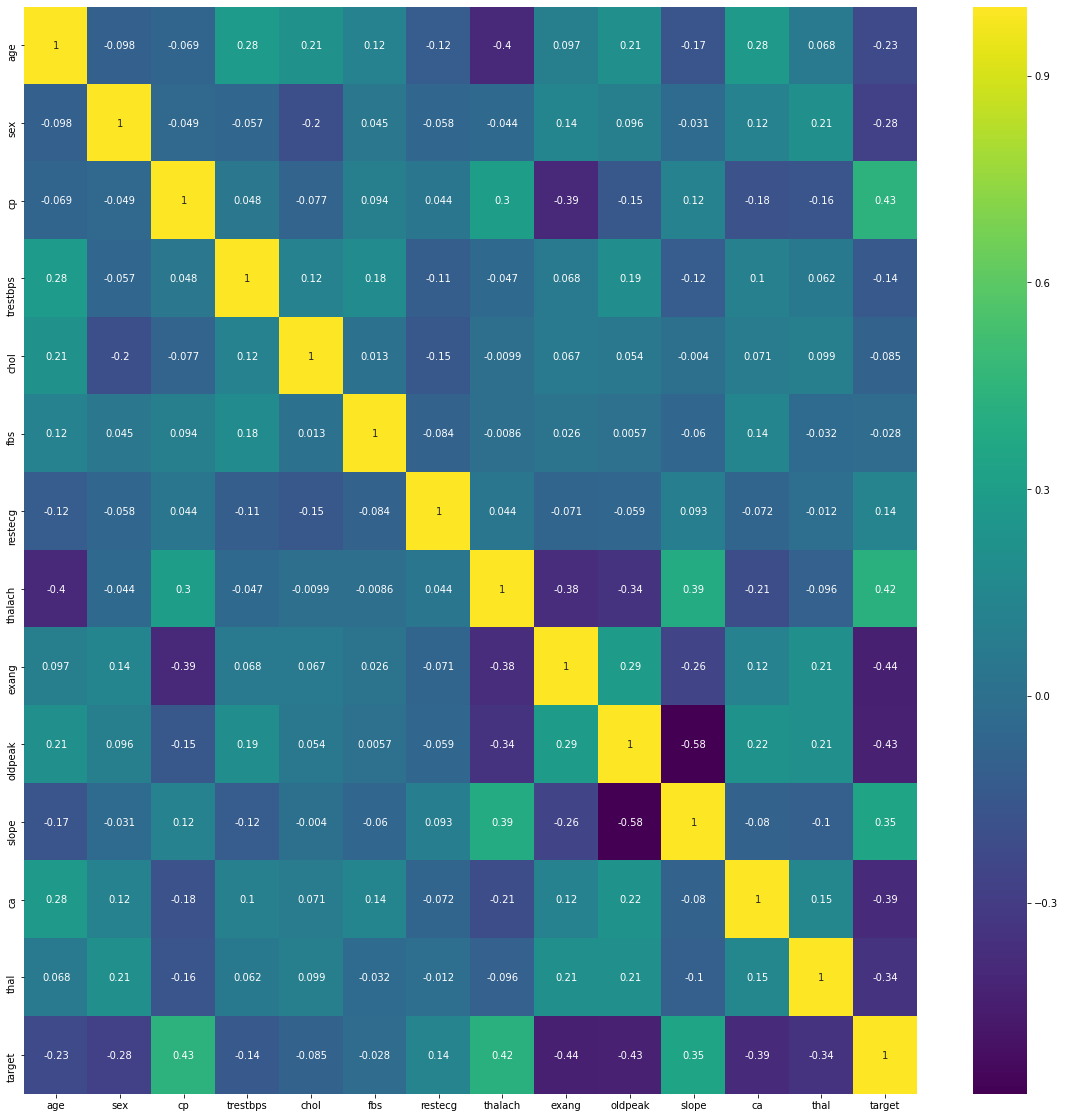

In [7]:
#Correlation is checked for feature selection

plt.figure(figsize=(20,20))
g = sns.heatmap(dataset[features].corr(), annot=True, cmap='viridis')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E2ED703508>,
      dtype=object)

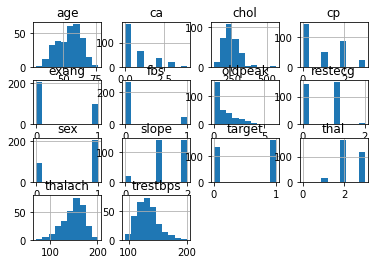

In [8]:
dataset.hist()

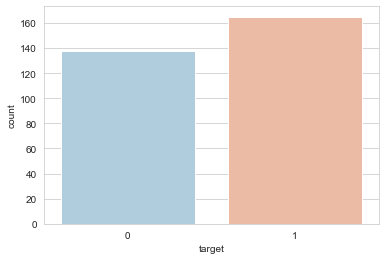

In [9]:
sns.set_style('whitegrid')
#countplot to check if the dataset is balanced
sns.countplot(x='target', data=dataset, palette='RdBu_r')

In [10]:
#categorical features are converted to dummy variables--like one-hot encoding
df = pd.get_dummies(dataset, columns=['sex', 'cp', 'fbs', 'restecg','exang', 'slope', 'ca', 'thal'])

In [11]:
df

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
299,45,110,264,132,1.2,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
300,68,144,193,141,3.4,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
301,57,130,131,115,1.2,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1


In [12]:
print(df.shape)
print(dataset.shape)

(303, 31)
(303, 14)


In [13]:
scaler = StandardScaler()
cols_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [14]:
df.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [15]:
X = df.drop(['target'], axis=1)
y = df['target']

In [16]:
scores = []
for k in range(1,21):
    knn = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn,X,y,cv=10)
    print(score)
    print(score.mean())
    scores.append(score.mean())

[0.87096774 0.77419355 0.67741935 0.83333333 0.8        0.66666667
 0.6        0.8        0.63333333 0.8       ]
0.7455913978494624
[0.83870968 0.64516129 0.77419355 0.83333333 0.8        0.76666667
 0.7        0.76666667 0.63333333 0.83333333]
0.7591397849462365
[0.87096774 0.77419355 0.74193548 0.93333333 0.8        0.8
 0.9        0.8        0.66666667 0.83333333]
0.8120430107526883
[0.80645161 0.77419355 0.80645161 0.93333333 0.8        0.76666667
 0.83333333 0.83333333 0.66666667 0.83333333]
0.8053763440860215
[0.90322581 0.77419355 0.87096774 0.96666667 0.86666667 0.73333333
 0.83333333 0.86666667 0.7        0.83333333]
0.8348387096774192
[0.87096774 0.80645161 0.87096774 0.93333333 0.8        0.8
 0.86666667 0.86666667 0.66666667 0.83333333]
0.831505376344086
[0.90322581 0.77419355 0.83870968 0.93333333 0.9        0.73333333
 0.9        0.86666667 0.66666667 0.9       ]
0.8416129032258064
[0.90322581 0.74193548 0.83870968 0.93333333 0.83333333 0.8
 0.9        0.86666667 0.733333

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

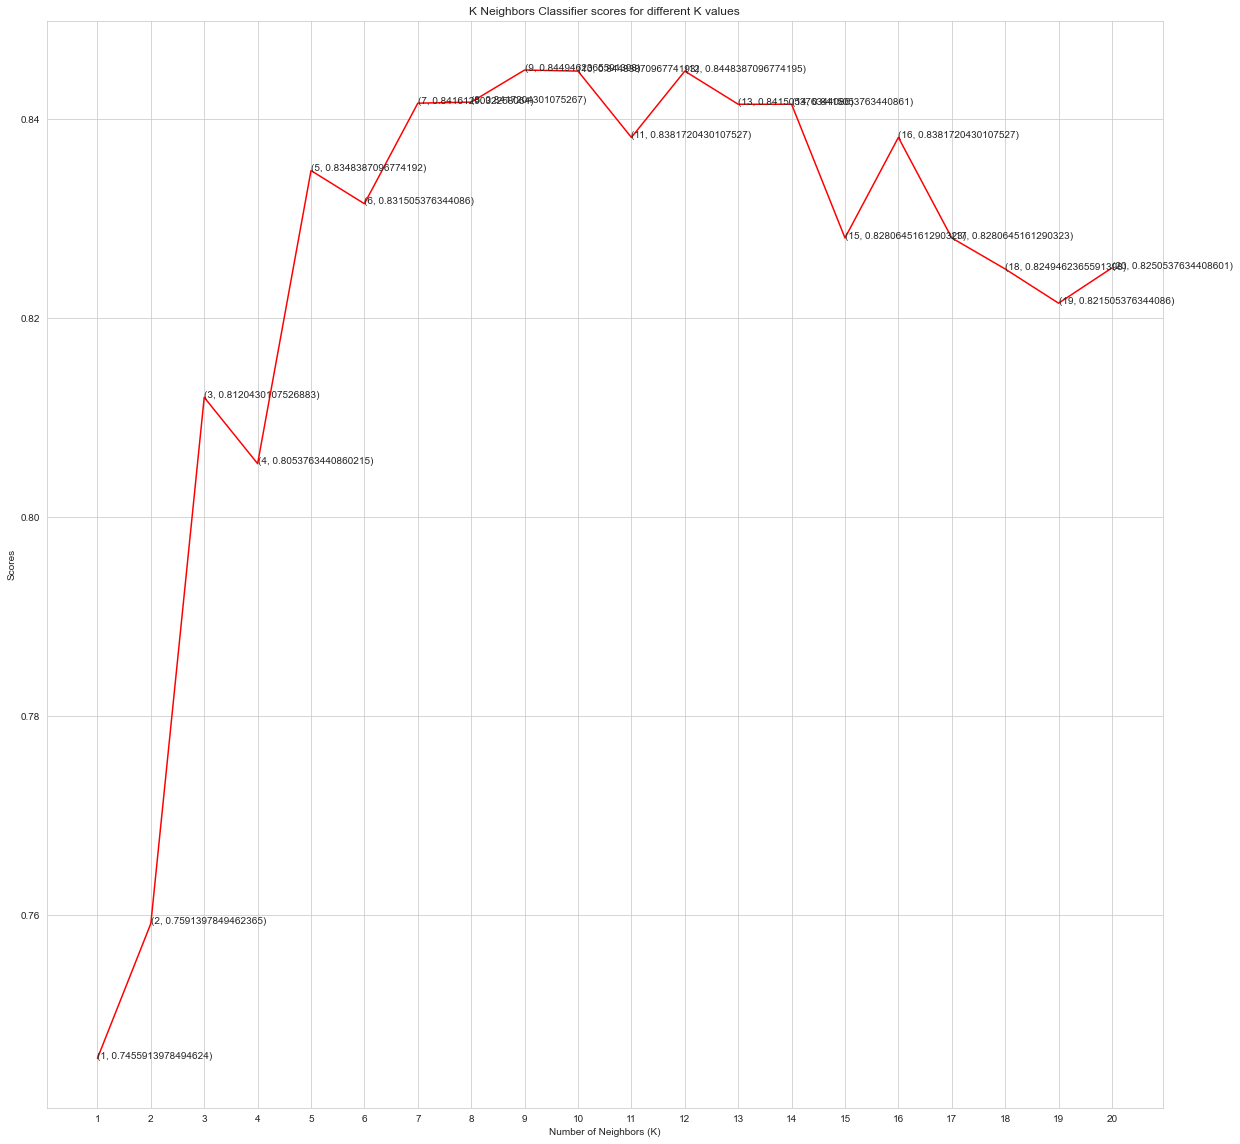

In [17]:
plt.figure(figsize=(20,20))
plt.plot([k for k in range(1, 21)], scores, color = 'red')
for i in range(1,21):
    plt.text(i, scores[i-1], (i, scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [18]:
scores

[0.7455913978494624,
 0.7591397849462365,
 0.8120430107526883,
 0.8053763440860215,
 0.8348387096774192,
 0.831505376344086,
 0.8416129032258064,
 0.8417204301075267,
 0.8449462365591398,
 0.8448387096774193,
 0.8381720430107527,
 0.8448387096774195,
 0.841505376344086,
 0.8415053763440861,
 0.8280645161290323,
 0.8381720430107527,
 0.8280645161290323,
 0.8249462365591398,
 0.821505376344086,
 0.8250537634408601]

In [19]:
#now remake the model with k=12
knn_clf = KNeighborsClassifier(n_neighbors=12)
score = cross_val_score(knn_clf, X,y,cv=10)
print(score.mean())

0.8448387096774195
